#Univariate Linear Regression  
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `Blood Pressure`?


In [0]:
from google.colab import files
uploaded = files.upload()

Saving climate_change.csv to climate_change (1).csv


In [0]:
import pandas as pd
data = pd.read_csv('climate_change.csv', delimiter=',')

data.head() # The head() function is used to get the first n rows. Default is 5.

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well

# genfromtxt : Load data from a text file, with missing values handled as specified.
# Each line past the first skip_header lines is split at the delimiter character, 
#  and characters following the comments character are discarded.
# @skip_header : The number of lines to skip at the beginning of the file.
# @usecols : Which columns to read, with 0 being the first. For example, usecols = (1, 4, 5) will extract the 2nd, 5th and 6th columns.
# dataset = np.genfromtxt('pima-diabetes.csv', delimiter=",", skip_header = True, usecols=(2, 7)) 

dataset = np.genfromtxt('climate_change.csv', delimiter=",", skip_header = True, usecols=(3, 10)) 
# dataset = data[['CO2', 'Temp']]
# dataset = dataset.to_numpy().astype(np.float32)

In [0]:
print(dataset.shape)
print('')
print(dataset[0:5])
# print(np.any(np.isnan(dataset)))
# print(dataset[:])

(308, 2)

[[3.4596e+02 1.0900e-01]
 [3.4552e+02 1.1800e-01]
 [3.4415e+02 1.3700e-01]
 [3.4225e+02 1.7600e-01]
 [3.4017e+02 1.4900e-01]]


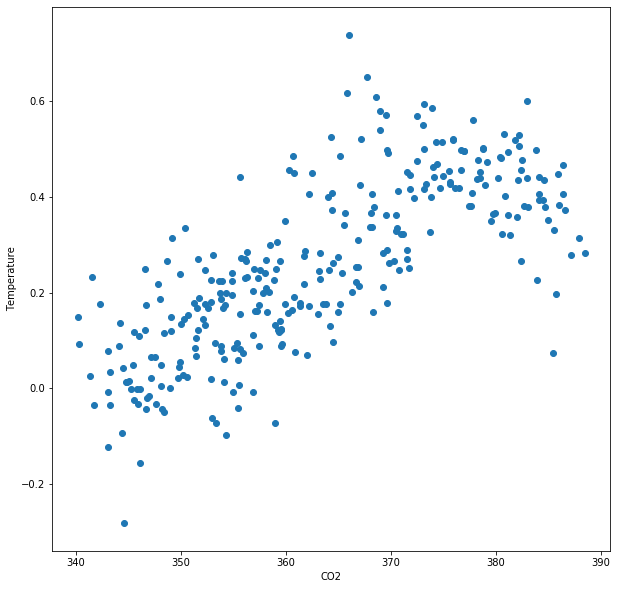

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(dataset[:, 0], dataset[:, 1])
# plt.xlabel('Blood Pressure')
# plt.ylabel('Age')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the neural network requires configuring the layers of the model, then compiling the model.
# Begin the creation of a linear (or “sequential”) arrangement of layers.
# Next, creates a fully-connected or densely-connected layer, as in, all neurons in the previous layer are connected to all neurons in the next layer.
# Dense() create a layer that is fully connected to the layer that precedes it.
# First paramaater specifies how many nodes should be in the layer. 
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

In [0]:
# Compile it using loss of mse and optimize with rmsprop
# mse = mean squared error
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(dataset[:, 0], dataset[:, 1], epochs = 1000, verbose = 0)
# model.fit(dataset[:, 0], dataset[:, 1], epochs = 1000, verbose = 1)

In [0]:
# Get weight of w0 and b0
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[0.00257126]
[-0.8687895]


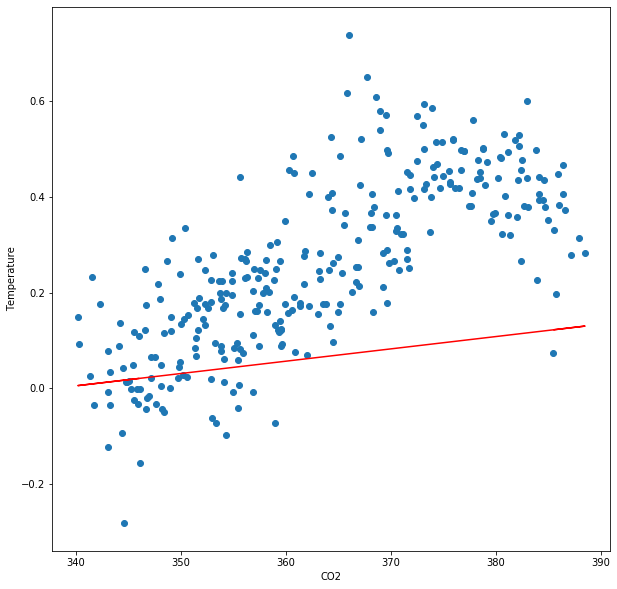

In [0]:
plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot(dataset[:, 0], b0 + w0 * dataset[:, 0], '-', color = 'red')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.show()

# This look for correlation